In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#load clean dataset
df = pd.read_csv('Algerian_Forest_firesdataset_Cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
#drop month day and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
#modify the other 'not fire' and use only fire and 'not fire'
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
#independent features and dependent features
X= df.drop('FWI', axis=1)   
y = df['FWI']

X,y


(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
 0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
 1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
 2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
 3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
 4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
 238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
 239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
 240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
 241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
 242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1
 
 [243 rows x 11 columns],
 0      0.5
 1      0.4
 2      0.1


In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (170, 11)
X_test shape:  (73, 11)
y_train shape:  (170,)
y_test shape:  (73,)


## 1.  Feature selection based on Correlation


Remove - highly positively correlated 
Important = highly negatively correlated

#### 1.1 Check for multicolinearity


<Axes: >

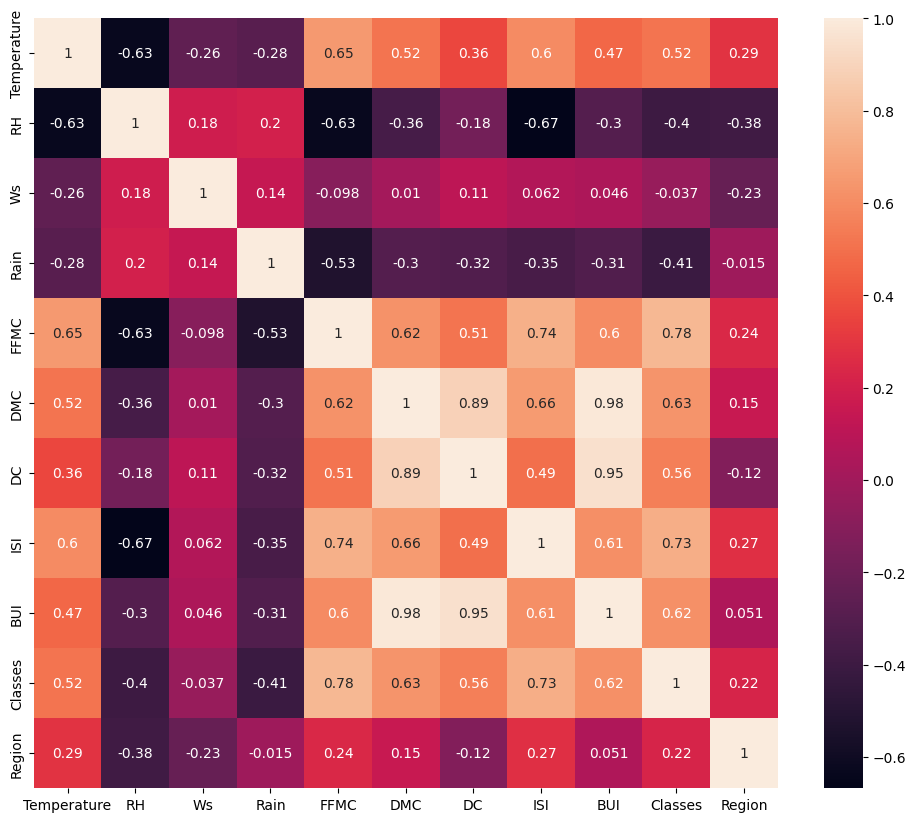

In [10]:
#plot correlation of X_train
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)

In [11]:
#function to remove highly positively correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
## threshold -- Domain expertise... here we are giving 85% correlation
corr_featuers = correlation(X_train, 0.85) #greater than 85%

corr_featuers


{'BUI', 'DC'}

In [13]:
## drop the highly correlated features (more than 85%)
X_train.drop(corr_featuers, axis=1, inplace=True)
X_test.drop(corr_featuers, axis=1, inplace=True)

X_train.shape, X_test.shape


((170, 9), (73, 9))

#### 1.2 Feature Scaling or Standardisation

In [14]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled, X_test_scaled

(array([[ 0.80614849,  0.28425439, -0.13063868, ..., -0.33001657,
          0.88852332,  0.976741  ],
        [ 1.08640461, -0.80166126,  0.23950424, ...,  1.17707817,
          0.88852332,  0.976741  ],
        [-0.03461987, -0.46231262, -0.5007816 , ...,  0.08321908,
          0.88852332,  0.976741  ],
        ...,
        [ 1.08640461, -0.25870343,  1.34993301, ...,  1.10415423,
          0.88852332, -1.02381286],
        [-1.7161566 ,  1.30230032,  1.34993301, ...,  0.03460312,
          0.88852332, -1.02381286],
        [-0.87538824,  0.75934249,  0.60964717, ..., -0.79186819,
         -1.12546287, -1.02381286]], shape=(170, 9)),
 array([[ 1.36666074, -1.75183746, -0.87092453, -0.09099764,  0.60264375,
          0.31658007,  0.03460312,  0.88852332,  0.976741  ],
        [-2.27666885,  0.14851493, -0.13063868, -0.295893  , -0.74857353,
         -0.90538841, -0.84048414, -1.12546287,  0.976741  ],
        [-1.43590048,  1.0308214 ,  0.23950424, -0.39834068, -0.92730597,
         -0

#### box plot to understand effect of standard scaler

Text(0.5, 1.0, 'After scaling')

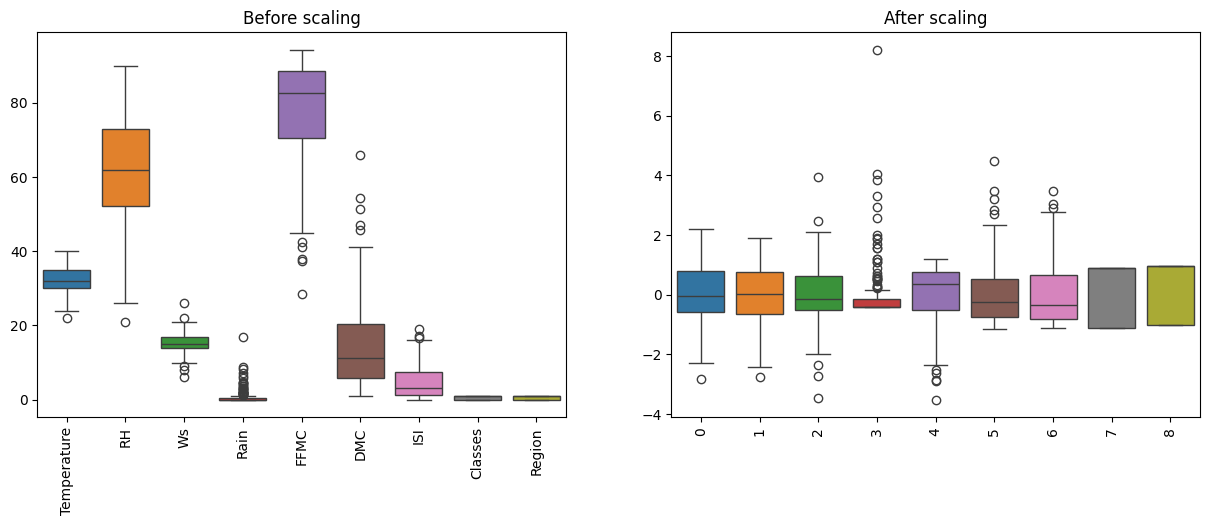

In [15]:
#plotbox plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.xticks(rotation = 90)
plt.title ('Before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.xticks(rotation = 90)
plt.title ('After scaling')

# 2. Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linreg = LinearRegression()

In [17]:
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)



Mean Absolute Error:  0.7375782113730383
Mean Squared Error:  1.0704237020026868
Root Mean Squared Error:  1.0346128271013688
R2 Score:  0.9839691127937101


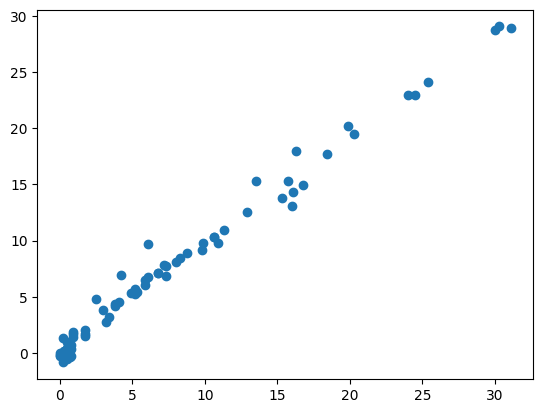

In [18]:
#scatter the plot
plt.scatter(y_test, y_pred) 

# 3. Lasso Regerssion Model

Mean Absolute Error:  1.4315355794906446
Mean Squared Error:  3.8300013934332604
Root Mean Squared Error:  1.957038935083628
R2 Score:  0.9426411053649225


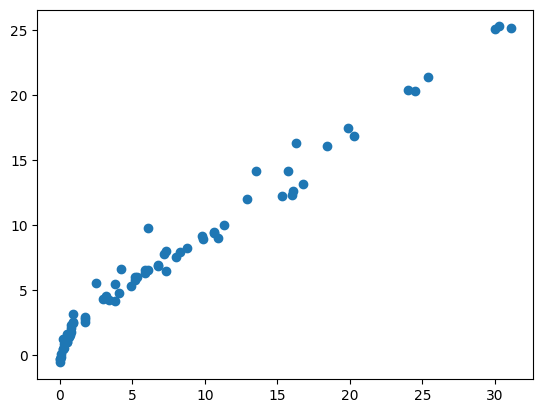

In [19]:
#lasso
from sklearn.linear_model import Lasso
lassoReg = Lasso()
lassoReg.fit(X_train_scaled, y_train)
y_pred = lassoReg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)


plt.scatter(y_test, y_pred)

### 3.1 Cross Validation Lasso

In [20]:
#CV Lasso
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv =5)
lassoCV.fit(X_train_scaled, y_train)


LassoCV(cv=5)

In [21]:
#to see the alpha
lassoCV.alpha_

np.float64(0.026093908403925278)

In [22]:
#what all the alphas that it tried
(lassoCV.alphas_)

array([6.46366035, 6.02803128, 5.62176215, 5.24287419, 4.88952202,
       4.5599846 , 4.2526569 , 3.96604206, 3.6987441 , 3.44946112,
       3.21697899, 3.00016537, 2.79796427, 2.60939084, 2.43352663,
       2.26951508, 2.11655736, 1.97390848, 1.84087365, 1.71680493,
       1.60109802, 1.49318938, 1.39255341, 1.29869997, 1.21117194,
       1.129543  , 1.05341559, 0.9824189 , 0.91620716, 0.85445786,
       0.79687026, 0.74316387, 0.69307711, 0.64636604, 0.60280313,
       0.56217621, 0.52428742, 0.4889522 , 0.45599846, 0.42526569,
       0.39660421, 0.36987441, 0.34494611, 0.3216979 , 0.30001654,
       0.27979643, 0.26093908, 0.24335266, 0.22695151, 0.21165574,
       0.19739085, 0.18408737, 0.17168049, 0.1601098 , 0.14931894,
       0.13925534, 0.12987   , 0.12111719, 0.1129543 , 0.10534156,
       0.09824189, 0.09162072, 0.08544579, 0.07968703, 0.07431639,
       0.06930771, 0.0646366 , 0.06028031, 0.05621762, 0.05242874,
       0.04889522, 0.04559985, 0.04252657, 0.03966042, 0.03698

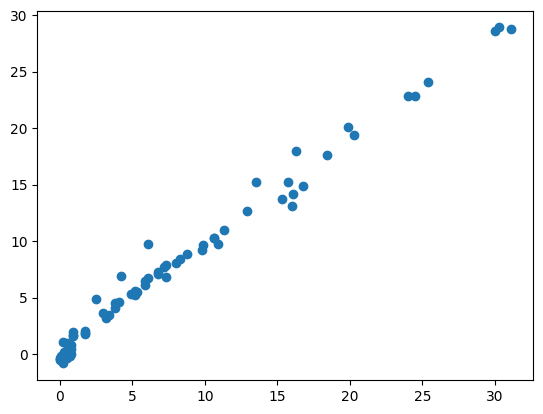

In [23]:
y_pred = lassoCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

# 4. Ridge Regression

Mean Absolute Error:  0.7639446488846958
Mean Squared Error:  1.1168940846733044
Root Mean Squared Error:  1.0568320986198823
R2 Score:  0.9832731627118574


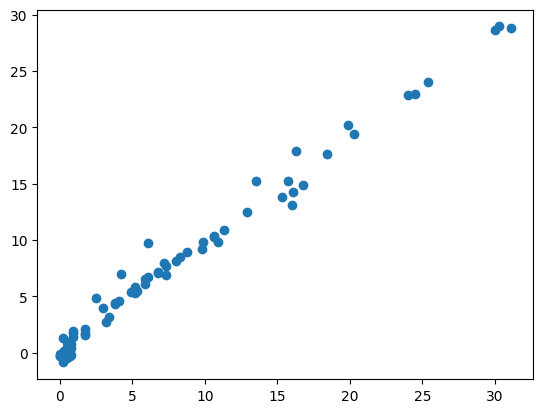

In [24]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge()
ridgeReg.fit(X_train_scaled, y_train)
y_pred = ridgeReg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
 
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)


### 4.1 Ridge Regression CV

In [25]:
#RIDGE CV
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [26]:
ridgeCV.alphas

(0.1, 1.0, 10.0)

In [27]:
ridgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean Absolute Error:  0.7639446488846958
Mean Squared Error:  1.1168940846733044
R 2 Score :  0.9832731627118574


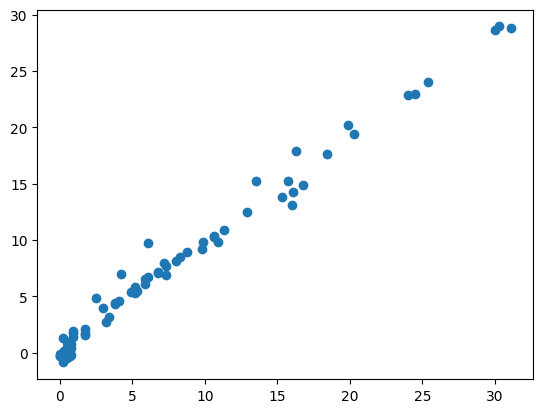

In [28]:
y_pred=ridgeCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2Score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R 2 Score : ", r2Score)

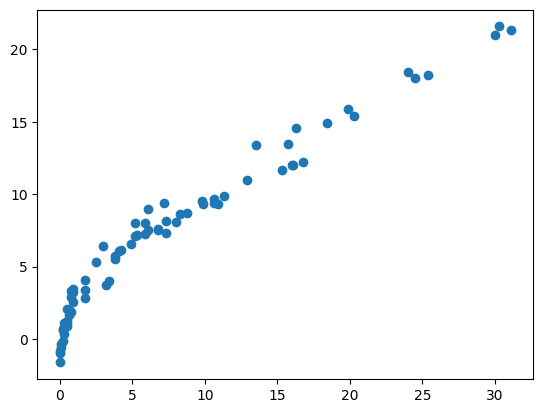

In [29]:
# elastic net
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled, y_train)
y_pred = elasticNet.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)


Mean Absolute Error:  2.101717815757062
Mean Squared Error:  8.753450395507981
Root Mean Squared Error:  2.9586230573542114
R2 Score:  0.8689065127260327


Mean Absolute Error:  2.101717815757062
Mean Squared Error:  8.753450395507981
Root Mean Squared Error:  2.9586230573542114
R2 Score:  0.8689065127260327


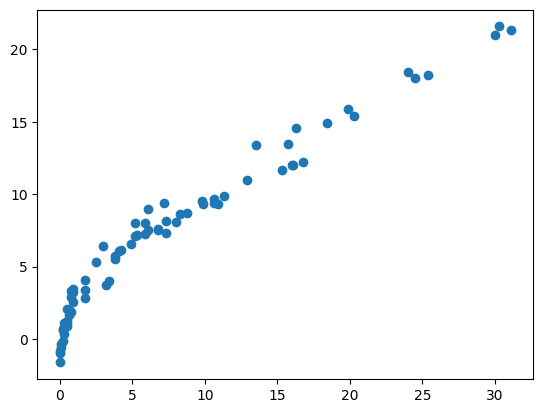

In [31]:
# elasticNet CV
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(cv=5)
elasticNetCV.fit(X_train_scaled, y_train)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)


In [32]:
elasticNetCV.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}


# Summary of Models and Their Performance

In this notebook, we have explored various regression models to predict the Fire Weather Index (FWI) using the Algerian Forest Fires dataset. Below is a summary of the models we have implemented and their performance metrics.

## 1. Linear Regression Model
- Mean Absolute Error:  0.7375782113730383
- Mean Squared Error:  1.0704237020026868
- Root Mean Squared Error:  1.0346128271013688
- R2 Score:  0.9839691127937101

## 2. Lasso Regression Model
- Mean Absolute Error:  1.4315355794906446
- Mean Squared Error:  3.8300013934332604
- Root Mean Squared Error:  1.957038935083628
- R2 Score:  0.9426411053649225

## 3. Ridge Regression Model
- Mean Absolute Error:  0.7639446488846958
- Mean Squared Error:  1.1168940846733044
- Root Mean Squared Error:  1.0568320986198823
- R2 Score:  0.9832731627118574

### 3.1 Ridge Regression CV
- Mean Absolute Error:  0.7639446488846958
- Mean Squared Error:  1.1168940846733044
- R 2 Score :  0.9832731627118574

## 4. Elastic Net Regression Model
- Mean Absolute Error:  2.101717815757062
- Mean Squared Error:  8.753450395507981
- Root Mean Squared Error:  2.9586230573542114
- R2 Score:  0.8689065127260327

### 4.1 Elastic Net CV
- Mean Absolute Error:  2.101717815757062
- Mean Squared Error:  8.753450395507981
- Root Mean Squared Error:  2.9586230573542114
- R2 Score:  0.8689065127260327

Overall, out of all model Ridge and linear regression have high accuracy


# 5. Model Pickling

In [33]:
# model pickling
scaler

StandardScaler()

In [34]:
ridgeReg

Ridge()

In [37]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridgeReg, open('ridgeReg.pkl', 'wb'))
            

For End to end project we use this pickle file



# Machine Learning Project Lifecycle

In this notebook, we will go through the complete lifecycle of a machine learning project. The steps involved are:

1. **Problem Definition**
2. **Data Collection**
3. **Data Cleaning and Preprocessing**
4. **Exploratory Data Analysis (EDA)**
5. **Feature Engineering**
6. **Model Selection**
7. **Model Training**
8. **Model Evaluation**
9. **Model Tuning**
10. **Model Deployment**
11. **Monitoring and Maintenance**

### 1. Problem Definition

Define the problem you are trying to solve. For example, predicting the Fire Weather Index (FWI) using the Algerian Forest Fires dataset.

### 2. Data Collection

Collect the data required for the project. In this case, we have the Algerian Forest Fires dataset.

### 3. Data Cleaning and Preprocessing

Clean and preprocess the data to make it suitable for analysis and modeling. This includes handling missing values, removing duplicates, and transforming data types.

### 4. Exploratory Data Analysis (EDA)

Perform EDA to understand the data better. This includes visualizing the data, identifying patterns, and detecting anomalies.

### 5. Feature Engineering

Create new features or modify existing ones to improve the performance of the model. This includes feature selection, feature scaling, and encoding categorical variables.

### 6. Model Selection

Select the appropriate machine learning algorithms for the problem. In this notebook, we have used Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression.

### 7. Model Training

Train the selected models on the training data.

### 8. Model Evaluation

Evaluate the performance of the models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score.

### 9. Model Tuning

Tune the hyperparameters of the models to improve their performance. This includes techniques such as cross-validation.

### 10. Model Deployment

Deploy the trained model to a production environment where it can be used to make predictions on new data.

### 11. Monitoring and Maintenance

Monitor the performance of the deployed model and maintain it by retraining it with new data as needed.

